# Movie Recommender System (Using Movielens dataset)

In [11]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Sample movie data
data = {
    'title': ['Inception', 'Interstellar', 'Tenet', 'Dunkirk', 'The Batman', 'Avengers: Endgame', 'Oppenheimer'],
    'genres': ['Action|Sci-Fi', 'Adventure|Drama|Sci-Fi', 'Action|Thriller|Sci-Fi', 'War|Drama', 'Action|Crime|Drama',
               'Action|Adventure|Sci-Fi', 'Biography|Drama|History'],
    'rating': [4.7, 4.5, 4.0, 3.8, 4.3, 4.8, 4.9],
    'year': [2010, 2014, 2020, 2017, 2022, 2019, 2023]
}

df = pd.DataFrame(data)
def recommend_top_rated(df, top_n=5):
    return df.sort_values(by='rating', ascending=False).head(top_n)
# Convert genres to numerical features
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))
genre_matrix = cv.fit_transform(df['genres'])

# Compute cosine similarity
genre_similarity = cosine_similarity(genre_matrix)

# Helper function
def recommend_similar_by_genre(movie_title, top_n=5):
    if movie_title not in df['title'].values:
        return f"{movie_title} not found in dataset."
    
    idx = df[df['title'] == movie_title].index[0]
    sim_scores = list(enumerate(genre_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    similar_movies = df.iloc[[i[0] for i in sim_scores]]
    return similar_movies[['title', 'genres', 'rating']]
def recommend_latest(df, top_n=5):
    return df.sort_values(by='year', ascending=False).head(top_n)
# Top rated
print("🎯 Top Rated Movies:")
print(recommend_top_rated(df))

# Similar to "Inception"
print("\n🎬 Movies similar to 'Inception':")
print(recommend_similar_by_genre('Inception'))

# Latest movies
print("\n🆕 Latest Movies:")
print(recommend_latest(df))



🎯 Top Rated Movies:
               title                   genres  rating  year
6        Oppenheimer  Biography|Drama|History     4.9  2023
5  Avengers: Endgame  Action|Adventure|Sci-Fi     4.8  2019
0          Inception            Action|Sci-Fi     4.7  2010
1       Interstellar   Adventure|Drama|Sci-Fi     4.5  2014
4         The Batman       Action|Crime|Drama     4.3  2022

🎬 Movies similar to 'Inception':
               title                   genres  rating
2              Tenet   Action|Thriller|Sci-Fi     4.0
5  Avengers: Endgame  Action|Adventure|Sci-Fi     4.8
1       Interstellar   Adventure|Drama|Sci-Fi     4.5
4         The Batman       Action|Crime|Drama     4.3
3            Dunkirk                War|Drama     3.8

🆕 Latest Movies:
               title                   genres  rating  year
6        Oppenheimer  Biography|Drama|History     4.9  2023
4         The Batman       Action|Crime|Drama     4.3  2022
2              Tenet   Action|Thriller|Sci-Fi     4.0  2020
5  A

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# For MovieLens Dataset

# Coverting ratings.dat file to ratings.csv file

In [29]:
import pandas as pd

# Define file paths
input_file = "movielens/ratings.dat"
output_file = "ratings.csv"

# Read the .dat file
df = pd.read_csv(input_file, sep="::", engine='python', header=None, names=['userId', 'movieId', 'rating', 'timestamp'])

# Save to CSV
df.to_csv(output_file, index=False)

print(f"Converted {input_file} to {output_file}")


Converted movielens/ratings.dat to ratings.csv


# Coverting movies.dat file to movies.csv file

In [21]:
import pandas as pd

# Try using ISO-8859-1 encoding
input_file = "movielens/movies.dat"
output_file = "movielens/movies.csv"

df = pd.read_csv(
    input_file,
    sep="::",
    engine="python",
    encoding="ISO-8859-1",  # fix for UnicodeDecodeError
    header=None,
    names=["movieId", "title", "genres"]
)

df.to_csv(output_file, index=False)

print(f"Converted {input_file} to {output_file} successfully!")


Converted movielens/movies.dat to movielens/movies.csv successfully!


In [32]:
#load dataset
import pandas as pd

# Load CSVs
movies = pd.read_csv("movielens/movies.csv")    # columns: movieId, title, genres
ratings = pd.read_csv("movielens/ratings.csv")  # columns: userId, movieId, rating, timestamp

# Merge ratings and movies
df = pd.merge(ratings, movies, on='movieId')

#preprocess data

import re

def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    return int(match.group(1)) if match else None

movies['year'] = movies['title'].apply(extract_year)
df = pd.merge(ratings, movies, on='movieId')

#top rated movies with minimum threshold

def recommend_top_rated(df, min_ratings=100, top_n=10):
    movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
    movie_stats.columns = ['avg_rating', 'num_ratings']
    filtered = movie_stats[movie_stats['num_ratings'] >= min_ratings]
    top_movies = filtered.sort_values(by='avg_rating', ascending=False).head(top_n)
    return top_movies

#Genre based recommender

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to transform genres
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))
genre_matrix = cv.fit_transform(movies['genres'])
genre_sim = cosine_similarity(genre_matrix)

def recommend_similar_by_genre(movie_title, top_n=10):
    if movie_title not in movies['title'].values:
        return f"'{movie_title}' not found in the dataset."

    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(genre_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    recommended = movies.iloc[[i[0] for i in sim_scores]]
    return recommended[['title', 'genres', 'year']]

#latest movies

def recommend_latest_movies(movies_df, top_n=10):
    return movies_df.sort_values(by='year', ascending=False).dropna(subset=['year']).head(top_n)[['title', 'genres', 'year']]

#function calls for execution

# Top rated
print("🎯 Top Rated Movies:")
print(recommend_top_rated(df))

# Genre-based
print("\n🎬 Movies similar to 'Toy Story (1995)':")
print(recommend_similar_by_genre('Toy Story (1995)'))

# Latest
print("\n🆕 Latest Movies:")
print(recommend_latest_movies(movies))



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


🎯 Top Rated Movies:
                                                    avg_rating  num_ratings
title                                                                      
Seven Samurai (The Magnificent Seven) (Shichini...    4.560510          628
Shawshank Redemption, The (1994)                      4.554558         2227
Godfather, The (1972)                                 4.524966         2223
Close Shave, A (1995)                                 4.520548          657
Usual Suspects, The (1995)                            4.517106         1783
Schindler's List (1993)                               4.510417         2304
Wrong Trousers, The (1993)                            4.507937          882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         4.491489          470
Raiders of the Lost Ark (1981)                        4.477725         2514
Rear Window (1954)                                    4.476190         1050

🎬 Movies similar to 'Toy Story (1995)':
                           

# GUI for Movie Recommender System

In [36]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import re

# === Load and preprocess data ===
movies = pd.read_csv("movielens/movies.csv", encoding="ISO-8859-1")
ratings = pd.read_csv("movielens/ratings.csv")
movies['year'] = movies['title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)
df = pd.merge(ratings, movies, on='movieId')

# === Top Rated ===
def get_top_rated(min_ratings=100, top_n=10):
    stats = df.groupby('title').agg({'rating': ['mean', 'count']})
    stats.columns = ['avg_rating', 'num_ratings']
    top_movies = stats[stats['num_ratings'] >= min_ratings].sort_values('avg_rating', ascending=False).head(top_n)
    return top_movies.reset_index()[['title', 'avg_rating']]

# === Genre-Based Similarity ===
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))
genre_matrix = cv.fit_transform(movies['genres'])
genre_sim = cosine_similarity(genre_matrix)

def get_similar_movies(title, top_n=5):
    if title not in movies['title'].values:
        return []
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(genre_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    return movies.iloc[[i[0] for i in sim_scores]][['title', 'genres']]

# === Latest Releases ===
def get_latest_movies(top_n=10):
    return movies.dropna(subset=['year']).sort_values(by='year', ascending=False).head(top_n)[['title', 'year']]

# === GUI Starts Here ===
def display_result(data):
    result_box.delete(*result_box.get_children())
    for _, row in data.iterrows():
        result_box.insert('', 'end', values=tuple(row))

def top_rated_action():
    result = get_top_rated()
    display_result(result)

def latest_action():
    result = get_latest_movies()
    display_result(result)

def similar_action():
    movie = movie_entry.get()
    result = get_similar_movies(movie)
    display_result(result)

# Setup window
root = tk.Tk()
root.title("🎬 Movie Recommender System")
root.geometry("800x500")

# Entry
ttk.Label(root, text="Enter a movie title:").pack(pady=5)
movie_entry = ttk.Entry(root, width=50)
movie_entry.pack()

# Buttons
button_frame = ttk.Frame(root)
button_frame.pack(pady=10)

ttk.Button(button_frame, text="Recommend Similar", command=similar_action).grid(row=0, column=0, padx=5)
ttk.Button(button_frame, text="Top Rated", command=top_rated_action).grid(row=0, column=1, padx=5)
ttk.Button(button_frame, text="Latest Movies", command=latest_action).grid(row=0, column=2, padx=5)

# Result Box
columns = ('title', 'info1')  # could be title + genre/rating/year depending on function
result_box = ttk.Treeview(root, columns=columns, show='headings')
result_box.heading('title', text='Movie Title')
result_box.heading('info1', text='Info')

result_box.pack(fill='both', expand=True, padx=10, pady=10)

root.mainloop()


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
#load dataset
import pandas as pd

# Load CSVs
movies = pd.read_csv("movielens/movies.csv")    # columns: movieId, title, genres
ratings = pd.read_csv("movielens/ratings.csv")  # columns: userId, movieId, rating, timestamp

# Merge ratings and movies
df = pd.merge(ratings, movies, on='movieId')

#preprocess data

import re

def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    return int(match.group(1)) if match else None

movies['year'] = movies['title'].apply(extract_year)
df = pd.merge(ratings, movies, on='movieId')

#top rated movies with minimum threshold

def recommend_top_rated(df, min_ratings=100, top_n=10):
    movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
    movie_stats.columns = ['avg_rating', 'num_ratings']
    filtered = movie_stats[movie_stats['num_ratings'] >= min_ratings]
    top_movies = filtered.sort_values(by='avg_rating', ascending=False).head(top_n)
    return top_movies

#Genre based recommender

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer to transform genres
cv = CountVectorizer(tokenizer=lambda x: x.split('|'))
genre_matrix = cv.fit_transform(movies['genres'])
genre_sim = cosine_similarity(genre_matrix)

def recommend_similar_by_genre(movie_title, top_n=10):
    if movie_title not in movies['title'].values:
        return f"'{movie_title}' not found in the dataset."

    idx = movies[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(genre_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    
    recommended = movies.iloc[[i[0] for i in sim_scores]]
    return recommended[['title', 'genres', 'year']]

#latest movies

def recommend_latest_movies(movies_df, top_n=10):
    return movies_df.sort_values(by='year', ascending=False).dropna(subset=['year']).head(top_n)[['title', 'genres', 'year']]

#function calls for execution

# Top rated
print("🎯 Top Rated Movies:")
print(recommend_top_rated(df))

# Genre-based
print("\n🎬 Movies similar to 'Sudden Death (1995)':")
print(recommend_similar_by_genre('Sudden Death (1995)'))

# Latest
print("\n🆕 Latest Movies:")
print(recommend_latest_movies(movies))



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


🎯 Top Rated Movies:
                                                    avg_rating  num_ratings
title                                                                      
Seven Samurai (The Magnificent Seven) (Shichini...    4.560510          628
Shawshank Redemption, The (1994)                      4.554558         2227
Godfather, The (1972)                                 4.524966         2223
Close Shave, A (1995)                                 4.520548          657
Usual Suspects, The (1995)                            4.517106         1783
Schindler's List (1993)                               4.510417         2304
Wrong Trousers, The (1993)                            4.507937          882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)         4.491489          470
Raiders of the Lost Ark (1981)                        4.477725         2514
Rear Window (1954)                                    4.476190         1050

🎬 Movies similar to 'Sudden Death (1995)':
                        

# ChatBot for customer care (Rule Based)

In [3]:
import tkinter as tk
from tkinter import scrolledtext

# --- Predefined Responses ---
responses = {
    "Business Hours": "Our support is available from 9 AM to 6 PM, Monday to Friday.",
    "Return Policy": "You can return the product within 15 days of purchase. Please ensure it is unused and in original packaging.",
    "Refund Policy": "Refunds are processed after quality check of the returned product, and will be credited within business hours.",
    "Contact Info": "You can reach us at support@example.com or call +1-800-123-456.",
    "Order Status": "Please provide your order ID so I can check the status for you.",
    "Thank You": "You're welcome! Let us know if you need further help.",
    "Other": "I'm sorry, I didn't understand that. Could you please rephrase?"
}

# --- Send and Display Bot Response ---
def send_message(user_text):
    chat_log.config(state='normal')
    chat_log.insert(tk.END, f"You: {user_text}\n")
    bot_response = responses.get(user_text, responses["Other"])
    chat_log.insert(tk.END, f"Bot: {bot_response}\n\n")
    chat_log.config(state='disabled')
    chat_log.see(tk.END)

# --- GUI Setup ---
root = tk.Tk()
root.title("Customer Support Chatbot")
root.geometry("650x500")

chat_log = scrolledtext.ScrolledText(root, state='disabled', wrap=tk.WORD, height=20)
chat_log.pack(padx=10, pady=10, fill=tk.BOTH, expand=True)

# --- Buttons Section ---
button_frame = tk.Frame(root)
button_frame.pack(pady=10)

# --- Define Buttons (Now Includes Return & Refund) ---
buttons = [
    "Business Hours", "Return Policy", "Refund Policy",
    "Contact Info", "Order Status", "Thank You"
]

# --- Create Buttons Dynamically ---
for i, label in enumerate(buttons):
    btn = tk.Button(button_frame, text=label, width=25, command=lambda l=label: send_message(l))
    btn.grid(row=i//2, column=i%2, padx=10, pady=5)

root.mainloop()


# Collapsible FAQ chatbot

In [4]:
import tkinter as tk

class FAQChatbot(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("FAQ-Based Customer Support Chatbot")
        self.geometry("600x600")
        self.configure(bg="white")

        tk.Label(self, text="Customer Support - FAQ", font=("Helvetica", 18, "bold"), bg="white").pack(pady=10)

        self.faq_data = {
            "What are your business hours?": "Our support is available from 9 AM to 6 PM, Monday to Friday.",
            "What is your return policy?": "You can return the product within 15 days of purchase. Please ensure it is unused and in original packaging.",
            "What is your refund policy?": "Refunds are processed after quality check of the returned product, and will be credited during business hours.",
            "How can I contact customer support?": "You can reach us at support@example.com or call +1-800-123-456.",
            "How can I check my order status?": "Please provide your order ID to track the status of your order."
        }

        self.create_faq_section()

    def create_faq_section(self):
        container = tk.Frame(self, bg="white")
        container.pack(fill="both", expand=True, padx=20)

        for question, answer in self.faq_data.items():
            self.add_faq_item(container, question, answer)

    def add_faq_item(self, parent, question, answer):
        frame = tk.Frame(parent, bg="white", bd=1, relief="solid")
        frame.pack(fill="x", pady=5)

        # Question Button
        is_expanded = tk.BooleanVar(value=False)

        def toggle():
            if is_expanded.get():
                answer_label.pack_forget()
                is_expanded.set(False)
            else:
                answer_label.pack(fill="x", padx=10, pady=5)
                is_expanded.set(True)

        question_btn = tk.Button(frame, text=question, font=("Helvetica", 12, "bold"), anchor="w", command=toggle, bg="#f0f0f0", relief="flat")
        question_btn.pack(fill="x", padx=10, pady=5)

        # Hidden Answer Label
        answer_label = tk.Label(frame, text=answer, font=("Helvetica", 11), wraplength=550, justify="left", bg="white")

# Run the chatbot GUI
if __name__ == "__main__":
    app = FAQChatbot()
    app.mainloop()


# The following code performs K-means clustering on a dataset (e.g., e-commerce or retail) to identify distinct customer groups.

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

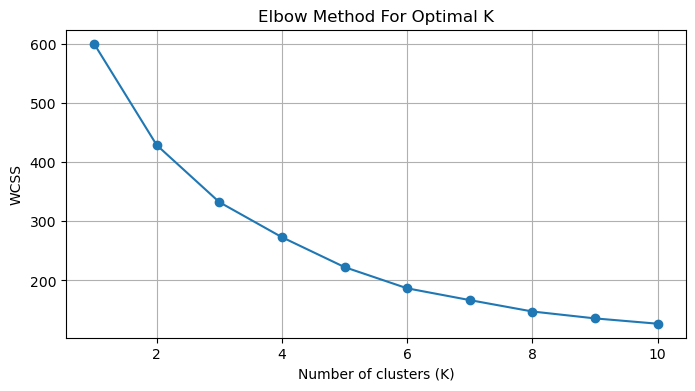

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


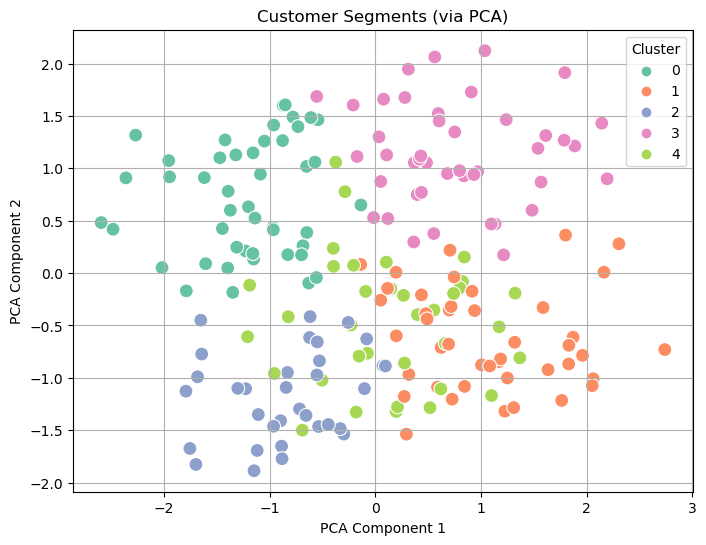

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        35.000000          115.586957               24.760870
1        60.232558           47.372093               53.116279
2        36.757576           42.242424               19.666667
3        52.488372          113.395349               70.930233
4        32.857143           54.742857               69.028571


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load sample e-commerce data (simulated)
data = {
    'CustomerID': range(1, 201),
    'Age': np.random.randint(18, 70, 200),
    'Annual Income (k$)': np.random.randint(15, 150, 200),
    'Spending Score (1-100)': np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

# Step 2: Data Preprocessing
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Elbow Method to choose optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 4: Apply KMeans with optimal K (let's assume 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (via PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 6: Summary
print(df.groupby('Cluster')[features].mean())
